부스팅 모델 중 가장 유명한 XGBoost를 활용하여 커플 성사를 예측하고,
그리드 서치로 하이퍼파라미터를 튜닝하여 더 나은 모델을 만들자

랜덤 포레스트: 각 트리를 독립적으로 만드는 알고리즘 <br>
부스팅: 순차적으로 트리를 만들어 이전 트리로부터 더 나은 트리를 만들어내는 알고리즘입니다.

XGBoost는 가장 먼저 개발되기도 했고, 가장 널리 활용됩니다.<br>
XGBoost는 손실 함수뿐만 아니라 모형 복잡도까지 고려합니다.<br>
캐글 컴피티션 우승자가 많이 사용하는 성능이 검증된 부스팅 모델입니다.

장점:
- 예측속도가 상당히 빠르며, 예측력 또한 좋습니다.
- 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보입니다
- 종속변수가 연속형, 범주형 상관없음
- 이미지나 자연어가 아닌 표로 정리된 데이터의 경우, 거의 모든 상황에 활용 가능

단점:
- 복잡한 모델인 만큼, 해석에 어려움이 있습니다.
- 더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다롭습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [4]:
pd.options.display.max_columns = 40

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

has null
- 무응답 항목이 있는지에 대한 정보

age/age_o
- 본인 나이/ 상대방 나이

race/ race_o
- 본인과 상대의 인종 정보

importance_same_race/ importance_same_religion
- 본인과 같은 인종과 종교를 중요시 여기는지에 대한 응답

변수 6개에 대한 4가지 관점 조사 (attractive, sincere, intelligence, funny, ambitious, shared_interests):
- 상대방 얼마나 중요시, 상대방의 평가, 본인이 중요시, 본인의 평가

외 여러가지 변수들

In [6]:
# 총 8378개의 관측치, 39개의 변수
# 마지막 match가 종속변수이며 나머지는 독립변수.

In [8]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [9]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

In [10]:
# tree형태의 algorithm은 결측치를 주로 -99로 처리하는데, 만약 결측치라는 사실 자체가 유의미한 차이를 보인다면
# -99를 분류하는 노드가 생겨날 겁니다.

# 우선 중요도와 관련된 변수들은 결측치를 제거합니다! (-99가 outlier가 될 수 있기 때문)

data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests','attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

In [12]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.002706
age_o                            0.002706
race                             0.000000
race_o                           0.000000
importance_same_race             0.000000
importance_same_religion         0.000000
pref_o_attractive                0.000000
pref_o_sincere                   0.000000
pref_o_intelligence              0.000000
pref_o_funny                     0.000000
pref_o_ambitious                 0.000000
pref_o_shared_interests          0.000000
attractive_o                     0.022755
sincere_o                        0.031488
intelligence_o                   0.034071
funny_o                          0.040590
ambitous_o                       0.084625
shared_interests_o               0.127798
attractive_important             0.000000
sincere_important                0.000000
intellicence_important           0.000000
funny_important                  0

In [13]:
# 나머지 변수들의 결측치는 -99로 채웁시다
data = data.fillna(-99)

In [14]:
def age_gap(x):
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else:
        return x['age'] - x['age_o']

In [15]:
# 남자가 연상이면 +값이, 여자가 연상이면 - 값
data['age_gap'] = data.apply(age_gap, axis=1)

In [16]:
data['age_gap_abs'] = abs(data['age_gap'])

In [19]:
def same_race(x):
    if x['race'] == -99:
        return -99
    elif x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else:
        return -1

In [20]:
data['same_race'] = data.apply(same_race, axis=1)

In [21]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [22]:
data['same_race_point'] = data.apply(same_race_point, axis=1)

In [23]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,...,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,age_gap_abs,same_race,same_race_point
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,...,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0,6.0,6.0,-1,-2.0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,...,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0,1.0,1.0,-1,-2.0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,-99.0,1.0,1,1.0,1.0,1,2.0
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,...,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1,2.0,2.0,-1,-2.0
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,...,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1,3.0,3.0,-1,-2.0


In [24]:
def rating(data, importance, score):
    if data[importance] == -99:
        return -99
    elif data[score] == -99:
        return -99
    else:
        return data[importance] * data[score]

In [25]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [26]:
partner_imp = data.columns[8:14]
partner_rate_me = data.columns[14:20]
my_imp = data.columns[20:26]
my_rate_partner = data.columns[26:32]

In [27]:
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']

new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

In [28]:
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [29]:
for i, j, k in zip(new_label_me, my_imp, my_rate_partner):
    data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [30]:
data = pd.get_dummies(data, columns=['gender', 'race', 'race_o'], drop_first=True)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1), data['match'], test_size=0.2, random_state=100)

In [35]:
import xgboost as xgb

In [36]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state=100)

In [37]:
model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [38]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8690036900369004

In [39]:
# 해당 accuracy가 좋은 값은 아님. 애초에 매칭률이 16%정도이므로 모두 0으로 예측해도 84%는 맞출수 있기 때문
print(confusion_matrix(y_test, pred))

[[1300   65]
 [ 148  113]]


In [40]:
# 실제 안됐는데 됐다고 한 경우가 65건,
# 실제 됐는데 안됐다고 한 경우가 148건
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.43      0.51       261

    accuracy                           0.87      1626
   macro avg       0.77      0.69      0.72      1626
weighted avg       0.86      0.87      0.86      1626



In [41]:
# 목표값중 1(매칭 성사된 경우)에 대해서 정확도가 현저하게 떨어진다.

# 이번엔 하이퍼파라미터 값에 임의로 넣어서 찾지 않고,
# Grid Search를 사용하여 수백가지의 하이퍼파라미터 값을 컴퓨터가 직접 넣게 한다.

# 하이퍼 파라미터 값 후보 정의
max_depth = [3, 5, 10]
learning_rate = [0.01, 0.05, 0.1]

# 9가지 조합 완성

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate' : [0.01, 0.1, 0.3],
    'max_depth' : [5, 7, 10], 
    # subsample: 데이터의 percentage만 사용하여 tree제작 (overfitting 방지 가능)
    'subsample' : [0.5, 0.7, 1],
    # n_estimators: 전체 나무의 개수
    'n_estimators' : [300, 500, 1000]
}

In [44]:
# grid search 이용하여 다시 모델링 ㄱㄱ
model = xgb.XGBClassifier()
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv = 5)

In [45]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [46]:
# 모델링을 거친후, 적용되는 모델은 최적의 하이퍼파라미터 조합이 자동 반영됨
pred = gs_model.predict(X_test)

In [47]:
accuracy_score(y_test, pred)

0.8677736777367774

In [48]:
# grid search를 통한 hyper parameter tuning 후에도 accuracy가 많이 개선되지는 못했음
# 결국 accuracy를 크게 올리려면, feature engineering과 model algorithm 선정이 영향을 미친다.

In [49]:
# 최적의 하이퍼파라미터 출력
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}

In [50]:
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000, subsample=0.5, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [51]:
model.feature_importances_

array([0.01819486, 0.00989549, 0.0111782 , 0.009017  , 0.01364212,
       0.01370795, 0.01044157, 0.01432143, 0.0112383 , 0.01220805,
       0.01187364, 0.04149368, 0.01171842, 0.00962038, 0.02816415,
       0.01224416, 0.01914566, 0.01568731, 0.01054792, 0.01655982,
       0.0108076 , 0.00942059, 0.01252668, 0.02517975, 0.01113309,
       0.01056412, 0.02203647, 0.01264612, 0.01548078, 0.010767  ,
       0.01181634, 0.02150448, 0.06137006, 0.01966265, 0.03530204,
       0.01184297, 0.01341042, 0.00764294, 0.01332174, 0.01243445,
       0.0120828 , 0.01323388, 0.01257525, 0.00987298, 0.00975263,
       0.01079004, 0.01116284, 0.01194337, 0.01218576, 0.01062766,
       0.01012287, 0.00793751, 0.04609776, 0.00929323, 0.0282979 ,
       0.0291527 , 0.04466046, 0.01399204, 0.01555375, 0.03089423],
      dtype=float32)

In [52]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [54]:
feature_imp

,features,values
0,has_null,0.018195
1,age,0.009895
2,age_o,0.011178
3,importance_same_race,0.009017
4,importance_same_religion,0.013642
5,pref_o_attractive,0.013708
6,pref_o_sincere,0.010442
7,pref_o_intelligence,0.014321
8,pref_o_funny,0.011238
9,pref_o_ambitious,0.012208


<Axes: xlabel='values', ylabel='features'>

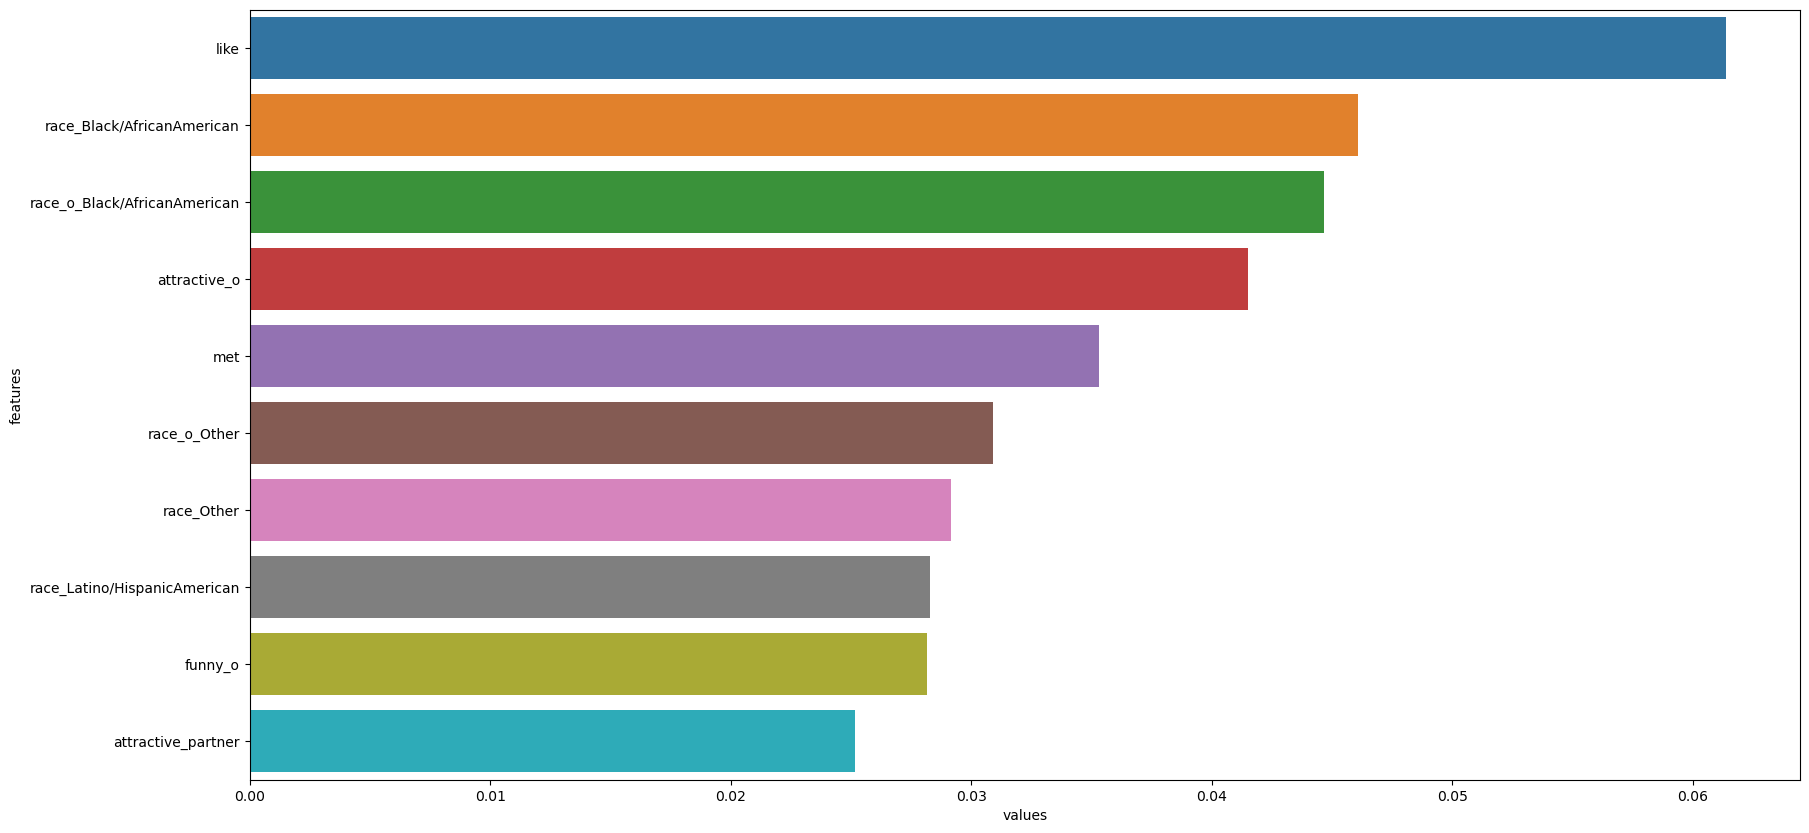

In [55]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features', data=feature_imp.sort_values(by='values', ascending=False).head(10))

XGBoost는 Random Forest와 달리 이전 tree를 기반으로 다음 tree를 만들어냅니다.